<a href="https://colab.research.google.com/github/ZivBenda/tabular_data_science_biu_final_project/blob/main/Tabular_Data_Science_Final_Project_Tomer_and_Ziv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install SHAP

In [1]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 10.3 MB/s eta 0:00:00


#Imports

In [2]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn import svm as skl_svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from xgboost import XGBRegressor,XGBClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
from xgboost import plot_importance




#Load the datasets

Dataset 1 - [Iris Species](https://www.kaggle.com/datasets/uciml/iris): Data of different iris plants classified into three species.

Dataset 2 - [Titanic passengers](https://www.kaggle.com/competitions/titanic/data) : This data contains the detailes of the passengers classified to survived or to not survived from the disaster.

Dataset 3 - [Cancer detection](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data): Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Dataset 4 - [Stress detection in sleep](https://www.kaggle.com/datasets/laavanya/human-stress-detection-in-and-through-sleep): Sleeping parameters captured for sleep study be an IoT sensor.

In [3]:
IRIS_URL = "https://raw.githubusercontent.com/ZivBenda/tabular_data_science_biu_final_project/main/datasets/IRIS.csv"
TITANIC_URL = "https://raw.githubusercontent.com/ZivBenda/tabular_data_science_biu_final_project/main/datasets/titanic.csv"
CANCER_URL = "https://raw.githubusercontent.com/ZivBenda/tabular_data_science_biu_final_project/main/datasets/cancer.csv"
SLEEPING_URL = "https://raw.githubusercontent.com/ZivBenda/tabular_data_science_biu_final_project/main/datasets/sleeping.csv"

IRIS_DATASET = "iris_dataset"
TITANIC_DATASET = "titanic_dataset"
CANCER_DATASET = "cancer_dataset"
SLEEPING_DATASET = "sleeping_dataset"

SEED = 2023
np.random.seed(SEED)##TODO

def reload_datasets():
    return { IRIS_DATASET: pd.read_csv(IRIS_URL),
             TITANIC_DATASET: pd.read_csv(TITANIC_URL),
             SLEEPING_DATASET: pd.read_csv(SLEEPING_URL),
             CANCER_DATASET: pd.read_csv(CANCER_URL)
           }

dtfs = reload_datasets()

# Models Definitions

In [4]:
def KNN(X_train, Y_train, X_test, dataset_name, class_names):
    print(f'Executing KNN on {dataset_name}')
    plt.subplot(121)
    n_neighbors = 15
    knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    knn.fit(X_train.values, Y_train)
    knn_explainer = shap.KernelExplainer(knn.predict, X_test)
    knn_shap_values = knn_explainer.shap_values(X_test)
    shap.summary_plot(knn_shap_values, X_test, show=False)
    plt.savefig(f'{dataset_name}_KNN.png')

    y_predict = knn.predict(X_test)
    return y_predict

def SVM(X_train, Y_train, X_test, dataset_name, class_names):
    print(f'Executing SVM on {dataset_name}')
    plt.subplot(121)
    svm = skl_svm.SVC(gamma='scale', decision_function_shape='ovo')
    svm.fit(X_train.values, Y_train)
    svm_explainer = shap.KernelExplainer(svm.predict, X_test)
    svm_shap_values = svm_explainer.shap_values(X_test)
    shap.summary_plot(svm_shap_values, X_test, show=False)
    plt.savefig(f'{dataset_name}_SVM.png')

    y_predict = svm.predict(X_test)
    return y_predict

def Decision_Tree(X_train, Y_train, X_test, dataset_name, class_names):
    print(f'Executing Decision_Tree on {dataset_name}')
    model = DecisionTreeClassifier(random_state=1, max_depth=5)
    model.fit(X_train, Y_train)
    decision_tree_explainer = shap.TreeExplainer(model)
    decision_tree_shap_values = decision_tree_explainer.shap_values(X_test)
    shap.summary_plot(decision_tree_shap_values, X_test, show=False, class_names=class_names)
    plt.savefig(f'{dataset_name}_decision_tree.png')
    # shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0])
    '''
    linear_reg_explainer = shap.KernelExplainer(linear_model.predict, X_test)
    linear_reg_shap_values = linear_reg_explainer.shap_values(X_test)
    shap.summary_plot(linear_reg_shap_values, X_test, show=False)
    plt.savefig(f'{dataset_name}_linear_regression.png')
    '''
    y_predict = model.predict(X_test)
    return y_predict

def Logistic_Regression(X_train, Y_train, X_test, dataset_name, class_names):
    print(f'Executing Logistic_Regression on {dataset_name}')
    logistic_reg_model = LogisticRegression(solver='lbfgs')
    logistic_reg_model.fit(X_train, Y_train)
    logistic_reg_explainer = shap.KernelExplainer(logistic_reg_model.predict, X_test)
    logistic_reg_shap_values = logistic_reg_explainer.shap_values(X_test)
    shap.summary_plot(logistic_reg_shap_values, X_test, show=False)
    plt.savefig(f'{dataset_name}_logistic_regression.png')

    y_predict = logistic_reg_model.predict(X_test)
    return y_predict
    

In [5]:
models={'KNN' : lambda X_train, Y_train, X_test, dataset_name, class_names : KNN(X_train, Y_train, X_test, dataset_name, class_names),
        'SVM' : lambda X_train, Y_train, X_test, dataset_name, class_names : SVM(X_train, Y_train, X_test, dataset_name, class_names),
        'Decision_Tree' : lambda X_train, Y_train, X_test, dataset_name, class_names : Decision_Tree(X_train, Y_train, X_test, dataset_name, class_names),
        'Logistic_Regression' : lambda X_train, Y_train, X_test, dataset_name, class_names:Logistic_Regression(X_train.values, Y_train, X_test, dataset_name, class_names)
        }

#XGBOOST model

We try to compare between the results of SHAP with the above models and the result of the tree-based XGBOOST model.

In [6]:
def XGBoostClassifier(X_train, Y_train, dataset_name):
    xgb = XGBClassifier()
    xgb.fit(X_train, Y_train)
    # plot feature importance
    plot_importance(xgb)
    pyplot.show()
    plt.savefig(f'{dataset_name}_XGBOOST.png')

#Preprocess the data

In [7]:
def preprocess_dataset(name, dataset):
    features = []
    if name == "iris_dataset":
        Y = dataset['species']
        features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
        X = dataset[features]

    elif name == "titanic_dataset":
        Y = dataset['Survived']
        # Ommiting Passenger-id, Name and Ticket columns
        features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']
        X = dataset[features]

    elif name == "sleeping_dataset":
        dataset['sl'] = dataset['sl'].astype(int)
        Y = dataset['sl']
        features = ['sr1', 'rr', 't', 'lm', 'bo', 'rem', 'sr2', 'hr']
        X = dataset[features]

    elif name == "cancer_dataset":
        Y = dataset['diagnosis']
        # Ommiting id and name
        features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                     'smoothness_mean', 'compactness_mean', 'concavity_mean',
                     'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                     'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
                     'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
                     'fractal_dimension_se', 'radius_worst', 'texture_worst',
                     'perimeter_worst', 'area_worst', 'smoothness_worst',
                     'compactness_worst', 'concavity_worst', 'concave points_worst',
                     'symmetry_worst', 'fractal_dimension_worst']
        X = dataset[features]
    return(X, Y)


#Models training

In [8]:
shap.initjs()
np.random.seed(0)

def models_train(X_train, y_train, X_test, y_test, dataset_name, target_strings):
    for model in models.values():
        y_predict = model(X_train, y_train, X_test, dataset_name, target_strings)

        print(classification_report(y_test, y_predict, target_names=target_strings))
        plt.show()

#Iris Dataset

## EDA IRIS - Data Exploration

In [9]:
dataset = dtfs[IRIS_DATASET]
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### labels organization

In [10]:
print(*list(dataset['species']))

Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor 

We can see that the column 'species' is ordered, so we shuffle it

In [11]:
dataset = shuffle(dataset)

In [12]:
print(*list(dataset['species']))

Iris-virginica Iris-versicolor Iris-setosa Iris-virginica Iris-setosa Iris-virginica Iris-setosa Iris-versicolor Iris-versicolor Iris-versicolor Iris-virginica Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor Iris-setosa Iris-versicolor Iris-versicolor Iris-setosa Iris-setosa Iris-virginica Iris-versicolor Iris-setosa Iris-setosa Iris-virginica Iris-setosa Iris-setosa Iris-versicolor Iris-versicolor Iris-setosa Iris-virginica Iris-versicolor Iris-setosa Iris-virginica Iris-virginica Iris-versicolor Iris-setosa Iris-versicolor Iris-versicolor Iris-versicolor Iris-virginica Iris-setosa Iris-virginica Iris-setosa Iris-setosa Iris-versicolor Iris-virginica Iris-virginica Iris-virginica Iris-virginica Iris-versicolor Iris-virginica Iris-versicolor Iris-versicolor Iris-virginica Iris-virginica Iris-virginica Iris-virginica Iris-versicolor Iris-virginica Iris-versicolor Iris-setosa Iris-virginica Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor Iris-virginica Iri

In [13]:
(X,Y) = preprocess_dataset(IRIS_DATASET, dataset)

In [14]:
print(X.head(5))

     sepal_length  sepal_width  petal_length  petal_width
114           5.8          2.8           5.1          2.4
62            6.0          2.2           4.0          1.0
33            5.5          4.2           1.4          0.2
107           7.3          2.9           6.3          1.8
7             5.0          3.4           1.5          0.2


### checking for missing values

In [15]:
print(X.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64


In [16]:
Y.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

([<matplotlib.patches.Wedge at 0x7fb7a7942eb0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Iris-virginica'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Iris-versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'Iris-setosa')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.33%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.33%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.33%')])

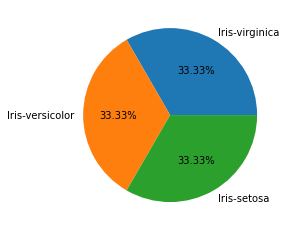

In [17]:
plt.pie(Y.value_counts(),labels=Y.unique(),autopct = '%1.2f%%')

### StratifiedShuffleSplit

We splits the data using StratifiedShuffleSplit in order to perseve the same labels ratio between train & test.

In [18]:
splitter=StratifiedShuffleSplit(n_splits=1,random_state=12, test_size=0.2) #we can make a number of combinations of split
#But we are interested in only one.

for train,test in splitter.split(X, Y):     #this will splits the index
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]
    y_test = Y.iloc[test]
print(y_train.value_counts())  
print(y_test.value_counts())

Iris-virginica     40
Iris-setosa        40
Iris-versicolor    40
Name: species, dtype: int64
Iris-virginica     10
Iris-setosa        10
Iris-versicolor    10
Name: species, dtype: int64


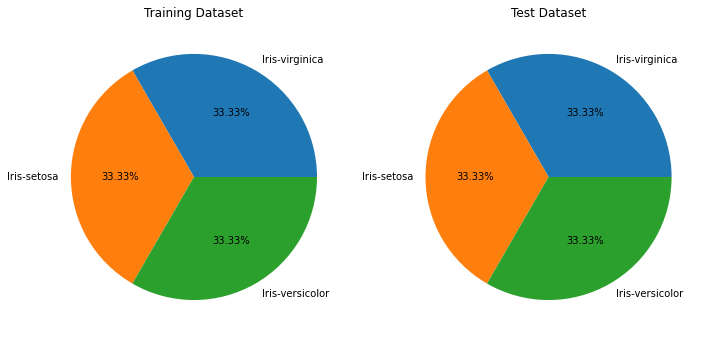

In [19]:
plt.figure(figsize=(10,15))

plt.subplot(121)
plt.pie(y_train.value_counts(),labels=y_train.unique(),autopct = '%1.2f%%')
plt.title('Training Dataset')

plt.subplot(122)
plt.pie(y_test.value_counts(),labels=y_test.unique(),autopct = '%1.2f%%')
plt.title('Test Dataset')

plt.tight_layout()


### Transforming the y string label using LabelEnconder
we also need to make sure we set the same label encoding for both y_train & y_test

In [20]:
le = preprocessing.LabelEncoder()
trained_le = le.fit(y_train)

y_train = trained_le.transform(y_train)
y_test = trained_le.transform(y_test)

### Get Class Names

In [21]:
Y.unique()

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [22]:
print(len(Y.unique()))
target_strings = le.inverse_transform(np.arange(len(Y.unique())))
target_strings

3


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

##Train models with SHAP

Executing KNN on iris_dataset


  0%|          | 0/30 [00:00<?, ?it/s]

X has feature names, but KNeighborsClassifier was fitted without feature names


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



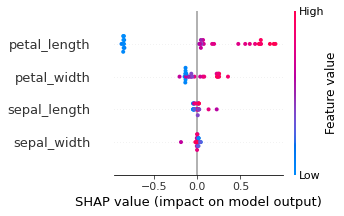

Executing SVM on iris_dataset


  0%|          | 0/30 [00:00<?, ?it/s]

X has feature names, but SVC was fitted without feature names


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



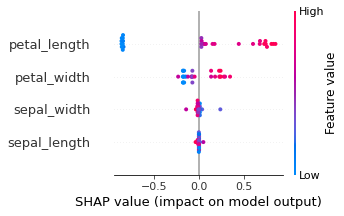

Executing Decision_Tree on iris_dataset
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      0.80      0.84        10
 Iris-virginica       0.82      0.90      0.86        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



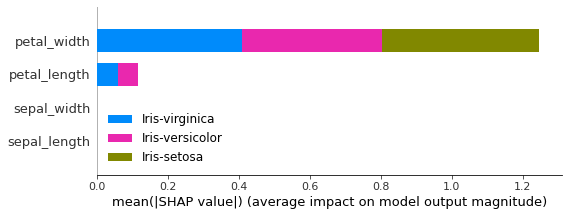

Executing Logistic_Regression on iris_dataset


  0%|          | 0/30 [00:00<?, ?it/s]

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.80      0.89        10
 Iris-virginica       0.83      1.00      0.91        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



X has feature names, but LogisticRegression was fitted without feature names


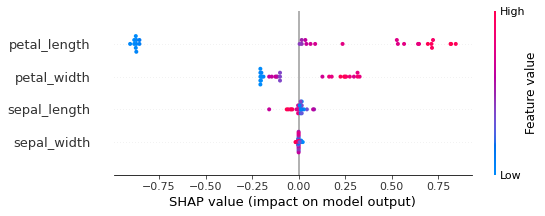

In [23]:
models_train(X_train, y_train, X_test, y_test, IRIS_DATASET, target_strings)

##XGBOOST

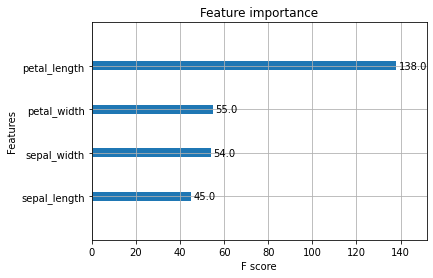

<Figure size 432x288 with 0 Axes>

In [24]:
XGBoostClassifier(X_train, y_train, IRIS_DATASET)

##Feature Selection
From the graphs above we can see that half of the models ranked 'sepal length' as the least important, and half of the models ranked 'sepal width' as the least important. However, the XGBOOST model ranked 'sepal length' as the least important too. Therefore, we choosh to select all features without 'sepal length' and train the models again.


In [25]:
X_train = X_train.drop(columns=['sepal_length'])
X_test = X_test.drop(columns=['sepal_length'])


Executing KNN on iris_dataset


  0%|          | 0/30 [00:00<?, ?it/s]

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



X has feature names, but KNeighborsClassifier was fitted without feature names


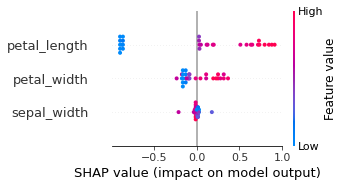

Executing SVM on iris_dataset


  0%|          | 0/30 [00:00<?, ?it/s]

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



X has feature names, but SVC was fitted without feature names


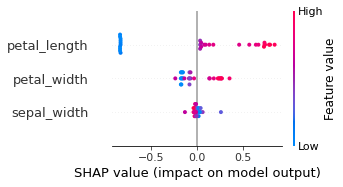

Executing Decision_Tree on iris_dataset
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      0.80      0.84        10
 Iris-virginica       0.82      0.90      0.86        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



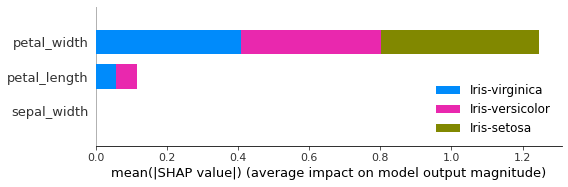

Executing Logistic_Regression on iris_dataset


  0%|          | 0/30 [00:00<?, ?it/s]

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.80      0.89        10
 Iris-virginica       0.83      1.00      0.91        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



X has feature names, but LogisticRegression was fitted without feature names


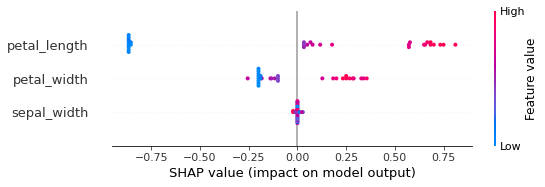

In [26]:
models_train(X_train, y_train, X_test, y_test, IRIS_DATASET, target_strings)

# Titanic dataset

## EDA TITANIC - Data Exploration

In [27]:
dataset = dtfs[TITANIC_DATASET]
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
(X,Y) = preprocess_dataset(TITANIC_DATASET, dataset)

### checking for missing values

In [29]:
print(X.isnull().sum())

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


the Cabin column has too many NA values, hence its better to be dropped

the NA values of Age can be filled by mean imputation, and of Embarked by mode imputation

In [30]:
X['Age'].fillna(X['Age'].mean(), inplace=True)
X['Embarked'].fillna(X['Embarked'].mode()[0], inplace=True)
X.drop(['Cabin'], axis=1, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Features and Labels Organization

We should convert the categorical data values into numeric.

In [31]:
X['Sex'] = LabelEncoder().fit_transform(X['Sex'])
X['Embarked'] = LabelEncoder().fit_transform(X['Embarked'])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [32]:
print(*list(dataset['Survived']))

0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 

We can see that the column 'Survived' is already encoded

In [33]:
print(X.head(5))

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  22.0      1      0   7.2500         2
1       1    0  38.0      1      0  71.2833         0
2       3    0  26.0      0      0   7.9250         2
3       1    0  35.0      1      0  53.1000         2
4       3    1  35.0      0      0   8.0500         2


In [34]:
Y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

([<matplotlib.patches.Wedge at 0x7fb7a40fe040>,
 [Text(-0.3925749350994583, 1.0275626113924428, '0'),
  Text(0.3925750313068116, -1.0275625746369201, '1')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.62%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.38%')])

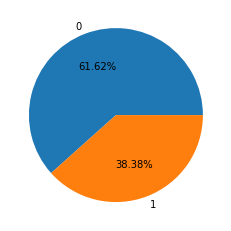

In [35]:
plt.pie(Y.value_counts(),labels=Y.unique(),autopct = '%1.2f%%')

### StratifiedShuffleSplit

We splits the data using StratifiedShuffleSplit in order to perseve the same labels ratio between train & test.

In [36]:
splitter=StratifiedShuffleSplit(n_splits=1,random_state=12, test_size=0.2) #we can make a number of combinations of split
#But we are interested in only one.

for train,test in splitter.split(X, Y):     #this will splits the index
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]
    y_test = Y.iloc[test]
print(y_train.value_counts())  
print(y_test.value_counts())

0    439
1    273
Name: Survived, dtype: int64
0    110
1     69
Name: Survived, dtype: int64


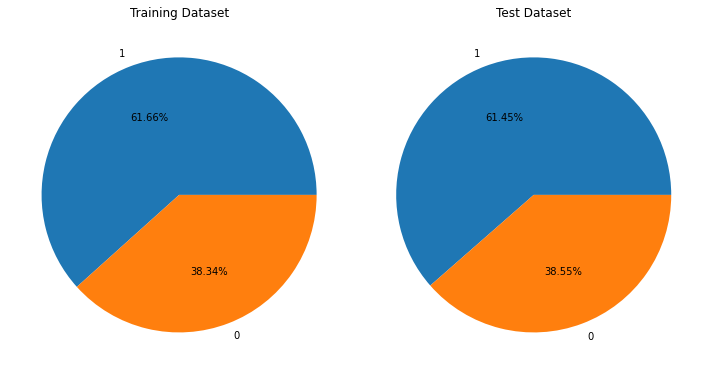

In [37]:
plt.figure(figsize=(10,15))

plt.subplot(121)
plt.pie(y_train.value_counts(),labels=y_train.unique(),autopct = '%1.2f%%')
plt.title('Training Dataset')

plt.subplot(122)
plt.pie(y_test.value_counts(),labels=y_test.unique(),autopct = '%1.2f%%')
plt.title('Test Dataset')

plt.tight_layout()


### Transforming the y string label using LabelEnconder
we also need to make sure we set the same label encoding for both y_train & y_test

In [38]:
le = preprocessing.LabelEncoder()
trained_le = le.fit(y_train)

y_train = trained_le.transform(y_train)
y_test = trained_le.transform(y_test)

### Get Class Names

In [39]:
Y.unique()

array([0, 1])

In [40]:
target_strings = np.array(['Not Survived', 'Survived'])
target_strings

array(['Not Survived', 'Survived'], dtype='<U12')

##Train models with SHAP

Executing KNN on titanic_dataset


  0%|          | 0/179 [00:00<?, ?it/s]

              precision    recall  f1-score   support

Not Survived       0.75      0.85      0.80       110
    Survived       0.70      0.55      0.62        69

    accuracy                           0.74       179
   macro avg       0.73      0.70      0.71       179
weighted avg       0.73      0.74      0.73       179



X has feature names, but KNeighborsClassifier was fitted without feature names


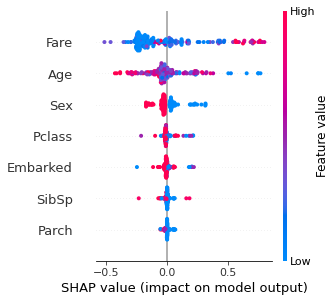

Executing SVM on titanic_dataset


  0%|          | 0/179 [00:00<?, ?it/s]

X has feature names, but SVC was fitted without feature names


              precision    recall  f1-score   support

Not Survived       0.67      0.94      0.78       110
    Survived       0.73      0.28      0.40        69

    accuracy                           0.68       179
   macro avg       0.70      0.61      0.59       179
weighted avg       0.70      0.68      0.64       179



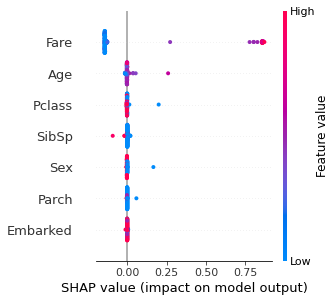

Executing Decision_Tree on titanic_dataset
              precision    recall  f1-score   support

Not Survived       0.83      0.87      0.85       110
    Survived       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



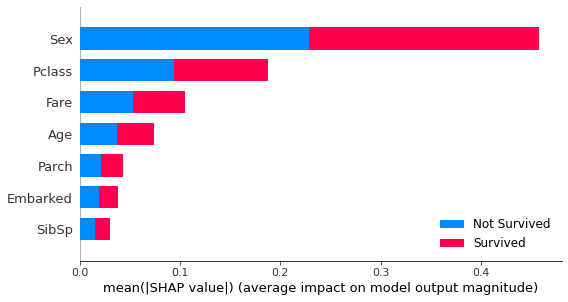

Executing Logistic_Regression on titanic_dataset


  0%|          | 0/179 [00:00<?, ?it/s]

              precision    recall  f1-score   support

Not Survived       0.83      0.85      0.84       110
    Survived       0.76      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



X has feature names, but LogisticRegression was fitted without feature names


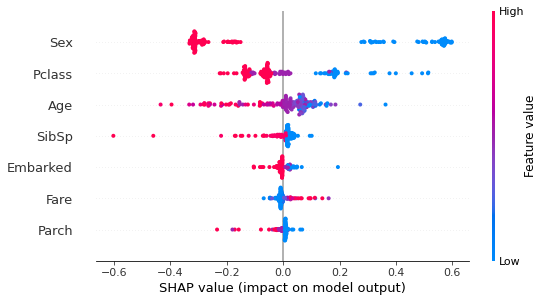

In [41]:
models_train(X_train, y_train, X_test, y_test, TITANIC_DATASET, target_strings)

##XGBOOST

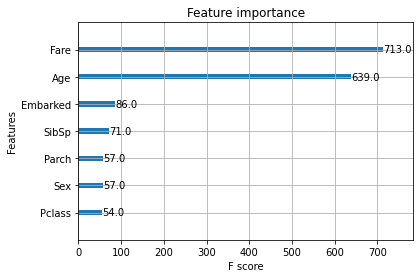

<Figure size 432x288 with 0 Axes>

In [42]:
XGBoostClassifier(X_train, y_train, TITANIC_DATASET)

##Feature Selection
From the graphs above its seems that the feature 'parch' is less important. Therefore, we choosh to select all features without 'parch' and train the models again.


In [43]:
X_train = X_train.drop(columns=['Parch'])
X_test = X_test.drop(columns=['Parch'])


Executing KNN on titanic_dataset


  0%|          | 0/179 [00:00<?, ?it/s]

              precision    recall  f1-score   support

Not Survived       0.76      0.87      0.81       110
    Survived       0.73      0.55      0.63        69

    accuracy                           0.75       179
   macro avg       0.74      0.71      0.72       179
weighted avg       0.75      0.75      0.74       179



X has feature names, but KNeighborsClassifier was fitted without feature names


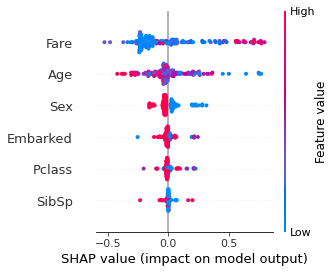

Executing SVM on titanic_dataset


  0%|          | 0/179 [00:00<?, ?it/s]

X has feature names, but SVC was fitted without feature names


              precision    recall  f1-score   support

Not Survived       0.67      0.94      0.78       110
    Survived       0.72      0.26      0.38        69

    accuracy                           0.68       179
   macro avg       0.69      0.60      0.58       179
weighted avg       0.69      0.68      0.63       179



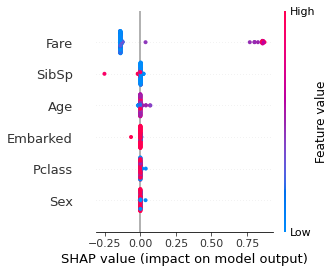

Executing Decision_Tree on titanic_dataset
              precision    recall  f1-score   support

Not Survived       0.82      0.89      0.85       110
    Survived       0.80      0.68      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



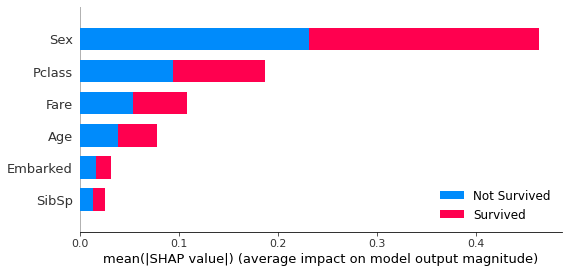

Executing Logistic_Regression on titanic_dataset


  0%|          | 0/179 [00:00<?, ?it/s]

              precision    recall  f1-score   support

Not Survived       0.84      0.85      0.85       110
    Survived       0.76      0.74      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



X has feature names, but LogisticRegression was fitted without feature names


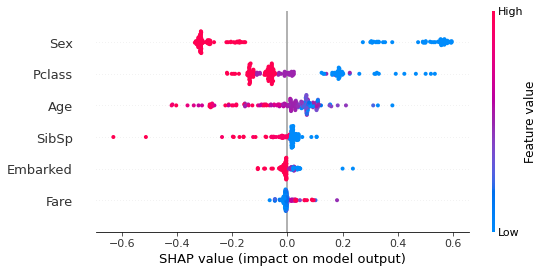

In [44]:
models_train(X_train, y_train, X_test, y_test, TITANIC_DATASET, target_strings)

# Sleeping dataset



## EDA SLEEPING - Data Exploration

In [45]:
dataset = dtfs[SLEEPING_DATASET]
dataset.head()

,sr1,rr,t,lm,bo,rem,sr2,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


### labels organization

In [46]:
print(*list(dataset['sl']))

3 3 1 3 0 1 0 0 0 1 2 1 0 4 3 1 1 3 3 2 2 2 2 3 3 1 2 1 3 2 0 4 0 4 2 3 0 4 0 4 2 2 2 0 2 4 2 4 1 4 0 1 3 0 1 2 4 3 3 1 4 3 0 2 4 1 0 2 4 0 1 4 1 0 0 4 4 1 3 4 1 1 1 4 2 1 1 1 3 4 2 3 2 4 0 2 4 2 2 3 4 4 0 4 1 2 2 2 4 1 2 4 0 3 2 4 2 2 0 1 1 3 4 1 3 4 4 2 1 4 2 0 4 3 1 0 0 2 4 0 2 3 2 0 2 0 0 0 0 1 3 0 4 4 0 2 3 2 4 4 4 2 1 2 4 2 0 0 4 4 1 2 2 1 1 1 1 4 3 1 1 1 2 1 0 2 0 2 1 2 1 1 4 3 4 0 0 0 2 3 0 0 0 2 4 0 2 4 1 1 1 3 0 0 3 3 0 2 2 2 1 4 0 1 3 4 2 1 4 0 3 4 1 3 0 0 3 4 3 1 4 3 3 4 3 0 3 2 3 3 1 4 2 3 1 3 2 3 4 2 4 3 2 0 0 1 2 3 2 2 4 4 1 0 4 1 2 3 4 3 3 3 0 3 0 1 3 3 3 2 4 0 4 0 4 0 2 1 2 1 3 0 0 3 2 2 4 2 3 0 3 2 1 0 1 0 3 3 3 0 3 4 2 4 3 4 1 2 0 2 4 0 1 3 4 0 1 0 0 3 0 0 2 3 2 4 0 1 3 4 3 4 4 3 4 2 0 4 2 3 2 1 2 2 4 0 3 0 1 3 4 3 2 0 3 1 2 4 0 1 4 1 2 0 3 0 1 1 3 1 4 1 4 1 4 1 0 3 3 3 3 3 4 2 2 3 1 3 3 2 0 4 4 1 1 0 1 4 3 0 1 4 4 0 0 1 1 0 4 0 4 2 0 2 3 2 2 4 3 1 4 1 1 1 2 4 4 3 2 0 1 3 1 3 1 1 1 1 4 2 4 1 4 2 2 1 3 3 2 1 0 0 3 1 0 3 1 0 1 4 0 0 3 2 2 4 1 3 2 4 2 4 2 1 3 0 1 0 0 3 

In [47]:
(X,Y) = preprocess_dataset(SLEEPING_DATASET, dataset)

In [48]:
print(X.head(5))

     sr1      rr       t      lm      bo    rem    sr2     hr
0  93.80  25.680  91.840  16.600  89.840  99.60  1.840  74.20
1  91.64  25.104  91.552  15.880  89.552  98.88  1.552  72.76
2  60.00  20.000  96.000  10.000  95.000  85.00  7.000  60.00
3  85.76  23.536  90.768  13.920  88.768  96.92  0.768  68.84
4  48.12  17.248  97.872   6.496  96.248  72.48  8.248  53.12


### checking for missing values

In [49]:
print(X.isnull().sum())

sr1    0
rr     0
t      0
lm     0
bo     0
rem    0
sr2    0
hr     0
dtype: int64


In [50]:
Y.value_counts()

3    126
1    126
0    126
2    126
4    126
Name: sl, dtype: int64

([<matplotlib.patches.Wedge at 0x7fb7a4198ee0>,
 [Text(0.8899186877588753, 0.6465637858537406, '3'),
  Text(-0.3399187231970732, 1.046162158377023, '1'),
  Text(-1.0999999999999988, -5.149471622296949e-08, '0'),
  Text(-0.33991862524830174, -1.0461621902025062, '2'),
  Text(0.8899187482945414, -0.6465637025335375, '4')],
 [Text(0.4854101933230228, 0.35267115592022213, '20.00%'),
  Text(-0.18541021265294902, 0.5706339045692853, '20.00%'),
  Text(-0.5999999999999993, -2.808802703071063e-08, '20.00%'),
  Text(-0.1854101592263464, -0.5706339219286397, '20.00%'),
  Text(0.4854102263424771, -0.3526711104728386, '20.00%')])

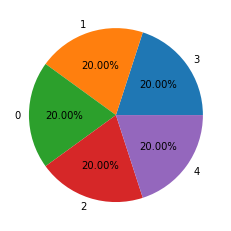

In [51]:
plt.pie(Y.value_counts(),labels=Y.unique(),autopct = '%1.2f%%')

### StratifiedShuffleSplit

We splits the data using StratifiedShuffleSplit in order to perseve the same labels ratio between train & test.

In [52]:
splitter=StratifiedShuffleSplit(n_splits=1,random_state=12, test_size=0.2) #we can make a number of combinations of split
#But we are interested in only one.

for train,test in splitter.split(X, Y):     #this will splits the index
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]
    y_test = Y.iloc[test]
print(y_train.value_counts())  
print(y_test.value_counts())

1    101
2    101
4    101
0    101
3    100
Name: sl, dtype: int64
3    26
4    25
1    25
2    25
0    25
Name: sl, dtype: int64


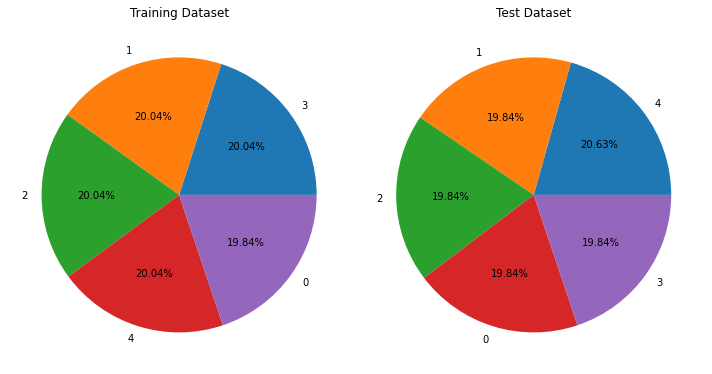

In [53]:
plt.figure(figsize=(10,15))

plt.subplot(121)
plt.pie(y_train.value_counts(),labels=y_train.unique(),autopct = '%1.2f%%')
plt.title('Training Dataset')

plt.subplot(122)
plt.pie(y_test.value_counts(),labels=y_test.unique(),autopct = '%1.2f%%')
plt.title('Test Dataset')

plt.tight_layout()


### Transforming the y string label using LabelEnconder
we also need to make sure we set the same label encoding for both y_train & y_test

In [54]:
le = preprocessing.LabelEncoder()
trained_le = le.fit(y_train)

y_train = trained_le.transform(y_train)
y_test = trained_le.transform(y_test)

##Train models with SHAP

In [55]:
Y.unique()

array([3, 1, 0, 2, 4])

Executing KNN on sleeping_dataset


  0%|          | 0/126 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           3       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           0       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



X has feature names, but KNeighborsClassifier was fitted without feature names


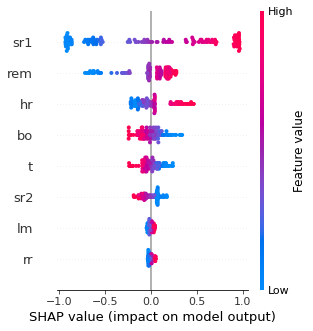

Executing SVM on sleeping_dataset


  0%|          | 0/126 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           3       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           0       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



X has feature names, but SVC was fitted without feature names


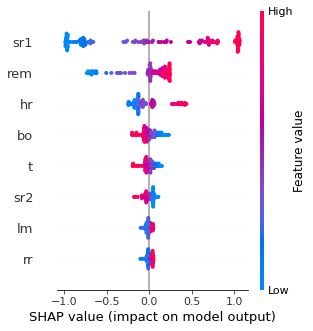

Executing Decision_Tree on sleeping_dataset
              precision    recall  f1-score   support

           3       1.00      0.96      0.98        25
           1       0.93      1.00      0.96        25
           0       1.00      0.96      0.98        25
           2       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           0.98       126
   macro avg       0.99      0.98      0.98       126
weighted avg       0.99      0.98      0.98       126



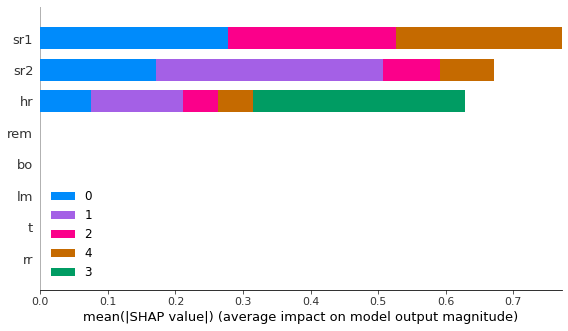

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Executing Logistic_Regression on sleeping_dataset


  0%|          | 0/126 [00:00<?, ?it/s]

X has feature names, but LogisticRegression was fitted without feature names


              precision    recall  f1-score   support

           3       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           0       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



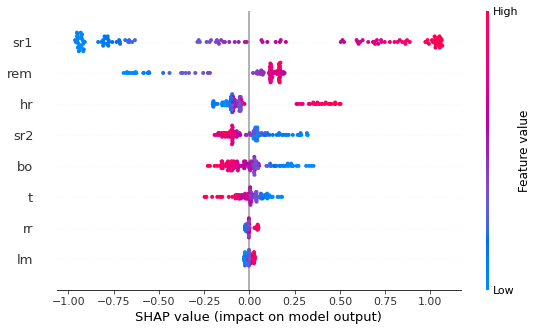

In [56]:
target_strings = np.array(['3', '1', '0', '2', '4'])  # Y.unique()
models_train(X_train, y_train, X_test, y_test, SLEEPING_DATASET, target_strings)

##XGBOOST

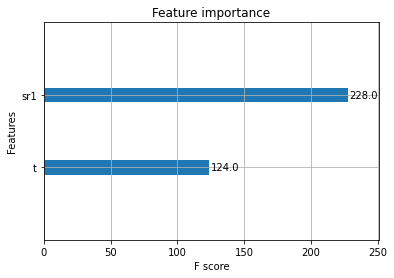

<Figure size 432x288 with 0 Axes>

In [57]:
XGBoostClassifier(X_train, y_train, SLEEPING_DATASET)

##Feature Selection
From the graphs above we can see that the models ranked 'rr' as the least important. Therefore, we choosh to select all features without 'rr' and train the models again.


In [58]:
X_train = X_train.drop(columns=['rr'])
X_test = X_test.drop(columns=['rr'])


Executing KNN on sleeping_dataset


  0%|          | 0/126 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           3       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           0       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



X has feature names, but KNeighborsClassifier was fitted without feature names


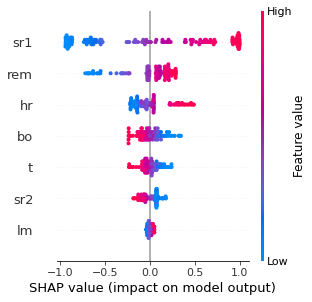

Executing SVM on sleeping_dataset


  0%|          | 0/126 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           3       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           0       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



X has feature names, but SVC was fitted without feature names


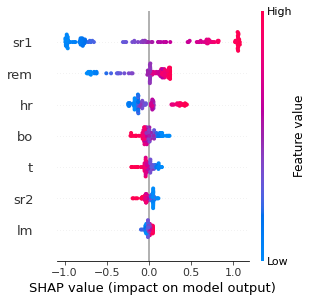

Executing Decision_Tree on sleeping_dataset
              precision    recall  f1-score   support

           3       1.00      0.96      0.98        25
           1       0.93      1.00      0.96        25
           0       1.00      0.96      0.98        25
           2       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           0.98       126
   macro avg       0.99      0.98      0.98       126
weighted avg       0.99      0.98      0.98       126



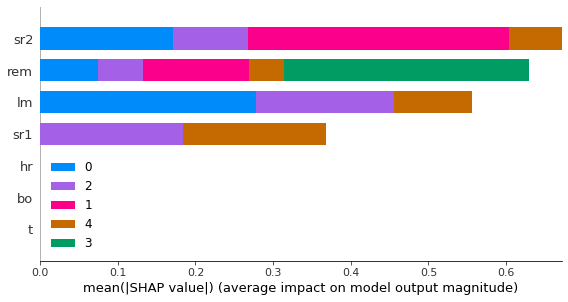

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Executing Logistic_Regression on sleeping_dataset


  0%|          | 0/126 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           3       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           0       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



X has feature names, but LogisticRegression was fitted without feature names


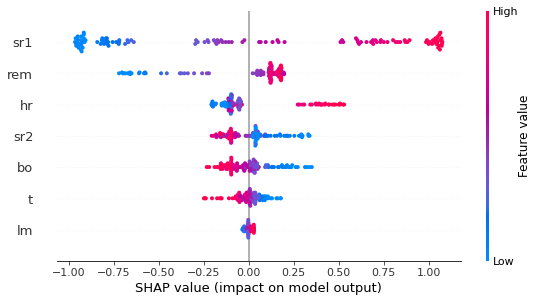

In [59]:
models_train(X_train, y_train, X_test, y_test, SLEEPING_DATASET, target_strings)

# Cancer dataset

## EDA CANCER - Data Exploration

In [60]:
dataset = dtfs[CANCER_DATASET]
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### labels organization

In [61]:
print(*list(dataset['diagnosis']))

M M M M M M M M M M M M M M M M M M M B B B M M M M M M M M M M M M M M M B M M M M M M M M B M B B B B B M M B M M B B B B M B M M B B B B M B M M B M B M M B B B M M B M M M B B B M B B M M B B B M M B B B B M B B M B B B B B B B B M M M B M M B B B M M B M B M M B M M B B M B B M B B B B M B B B B B B B B B M B B B B M M B M B B M M B B M M B B B B M B B M M M B M B M B B B M B B M M B M M M M B M M M B M B M B B M B M M M M B B M M B B B M B B B B B M M B B M B B M M B M B B B B M B B B B B M B M M M M M M M M M M M M M M B B B B B B M B M B B M B B M B M M B B B B B B B B B B B B B M B B M B M B B B B B B B B B B B B B B M B B B M B M B B B B M M M B B B B M B M B M B B B M B B B B B B B M M M B B B B B B B B B B B M M B M M M B M M B B B B B M B B B B B M B B B M B B M M B B B B B B M B B B B B B B M B B B B B M B B M B B B B B B B B B B B B M B M M B M B B B B B M B B M B M B B M B M B B B B B B B B M M B B B B B B M B B B B B B B B B B M B B B B B B B M B M B B M B B B B B M M 

shuffle diagnosis column

In [62]:
dataset = shuffle(dataset)

In [63]:
print(*list(dataset['diagnosis']))

B M B M M M B B B B M B M B B M B M B M B B M M B B B B B B B M M B M M M B M B M M B B B B M B B B B B B B B B M M B B B B B B B B B M B B B B B M M B M B B B M B B B B B M M B B B M B B B B B M B M B B M M M B B M M B B B M M B B B B M B M B M B B M B M M M B M B B B B B B M B B B B B B M B B B M B B B B M B B B M B B M B B B M M B B B M B M M M B M M M M B B B B B B B B B B B B M M B B B B M M B B B M B B M B B M B B B M M M B M B M B B B B B B B M M M B B M M M M B B B B B B M M B M M B M M M M B B M M B M B M B M B M M B M B M B B M B M B B B B B B B B M M M B M B B B B B M B B M M M B M M B B B M M M B B B B B M M B B B B M M B M B B B B B B B B M B M M M M B B B M B M B B B B M B M B M B B M B B B B M B M M B M B B M M M B B B B B B B M M B B B B B B B B B B B B M B B M B M B B B B B M B B B M M B B M B B B M M B B B B B B M M B B M M M M B B B M B B B B B B B M B B B M B B B B M M B B M M M B M B B B M B M B M B M B B B B B M M B M B M B M M M B B M B M M M B M B B B B M M M B 

In [64]:
(X,Y) = preprocess_dataset(CANCER_DATASET, dataset)

In [65]:
print(X.head(5))

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
206        9.876         17.27           62.92      295.4           0.1089   
567       20.600         29.33          140.10     1265.0           0.1178   
80        11.450         20.97           73.81      401.5           0.1102   
15        14.540         27.54           96.73      658.8           0.1139   
230       17.050         19.08          113.40      895.0           0.1141   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
206           0.07232         0.01756              0.01952         0.1934   
567           0.27700         0.35140              0.15200         0.2397   
80            0.09362         0.04591              0.02233         0.1842   
15            0.15950         0.16390              0.07364         0.2303   
230           0.15720         0.19100              0.10900         0.2131   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
206

### checking for missing values

In [66]:
print(X.isnull().sum())

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [67]:
Y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

([<matplotlib.patches.Wedge at 0x7fb7a4108280>,
 [Text(-0.4286546999573329, 1.0130425204326268, 'B'),
  Text(0.428654605109445, -1.013042560566172, 'M')],
 [Text(-0.23381165452218156, 0.5525686475087055, '62.74%'),
  Text(0.23381160278696997, -0.55256866939973, '37.26%')])

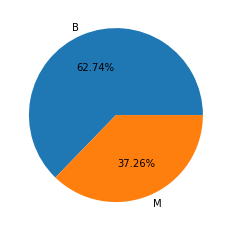

In [68]:
plt.pie(Y.value_counts(),labels=Y.unique(),autopct = '%1.2f%%')

### StratifiedShuffleSplit

We splits the data using StratifiedShuffleSplit in order to perseve the same labels ratio between train & test.

In [69]:
splitter=StratifiedShuffleSplit(n_splits=1,random_state=12, test_size=0.2) #we can make a number of combinations of split
#But we are interested in only one.

for train,test in splitter.split(X, Y):     #this will splits the index
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]
    y_test = Y.iloc[test]
print(y_train.value_counts())  
print(y_test.value_counts())

B    285
M    170
Name: diagnosis, dtype: int64
B    72
M    42
Name: diagnosis, dtype: int64


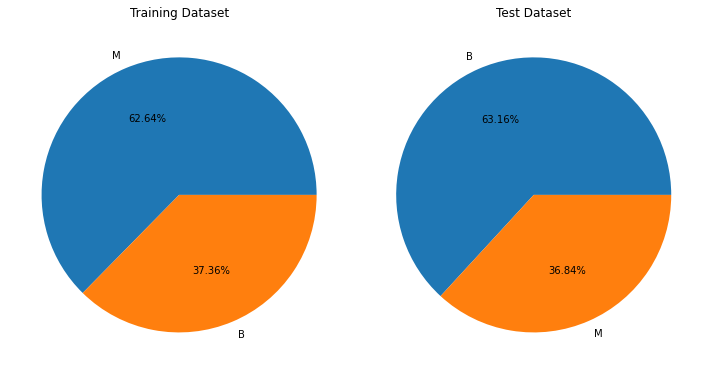

In [70]:
plt.figure(figsize=(10,15))

plt.subplot(121)
plt.pie(y_train.value_counts(),labels=y_train.unique(),autopct = '%1.2f%%')
plt.title('Training Dataset')

plt.subplot(122)
plt.pie(y_test.value_counts(),labels=y_test.unique(),autopct = '%1.2f%%')
plt.title('Test Dataset')

plt.tight_layout()


### Transforming the y string label using LabelEnconder
we also need to make sure we set the same label encoding for both y_train & y_test

In [71]:
le = preprocessing.LabelEncoder()
trained_le = le.fit(y_train)

y_train = trained_le.transform(y_train)
y_test = trained_le.transform(y_test)

##Train models with SHAP

In [ ]:
target_strings = Y.unique()
models_train(X_train, y_train, X_test, y_test, CANCER_DATASET, target_strings)

Executing KNN on cancer_dataset


  0%|          | 0/114 [00:00<?, ?it/s]

##XGBOOST

In [ ]:
XGBoostClassifier(X_train, y_train, CANCER_DATASET)

##Feature Selection
From the graphs above we can see that there are some features that even not appeared in the top 20 important features. Therefore, we choosh to select all features without the following:


*   compactness_worst
*   concave points_se
*   concavity_se
*   fractal_dimension_se
*   radius_mean
*   smoothness_worst
*   symmetry_worst



In [ ]:
X_train = X_train.drop(columns=['compactness_worst', 'concave points_se', 'concavity_se', 'fractal_dimension_se', 'radius_mean', 'smoothness_worst', 'symmetry_worst'])
X_test = X_test.drop(columns=['compactness_worst', 'concave points_se', 'concavity_se', 'fractal_dimension_se', 'radius_mean', 'smoothness_worst', 'symmetry_worst'])


In [ ]:
models_train(X_train, y_train, X_test, y_test, CANCER_DATASET, target_strings)